In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank.csv',sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df_1=df.copy()

In [4]:
df = df.rename(columns = {"y" : "deposit"})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
#Find missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
# Find features with one value
for col in df.columns:
    print(col,df[col].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
deposit 2


In [10]:
#Exploring categorical values
categorical_cols=[]
numerical_cols=[]

for col in df.columns:
    if df[col].dtypes=='object':
        categorical_cols.append(col)

for col in df.columns:
    if df[col].dtypes!='object':
        numerical_cols.append(col)

print("Number of Categorical Features:", len(categorical_cols),"\nCategorical Features:",categorical_cols)
print("Number of Numerical Features:", len(numerical_cols),"\nNumerical Features:",numerical_cols)

Number of Categorical Features: 10 
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
Number of Numerical Features: 7 
Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


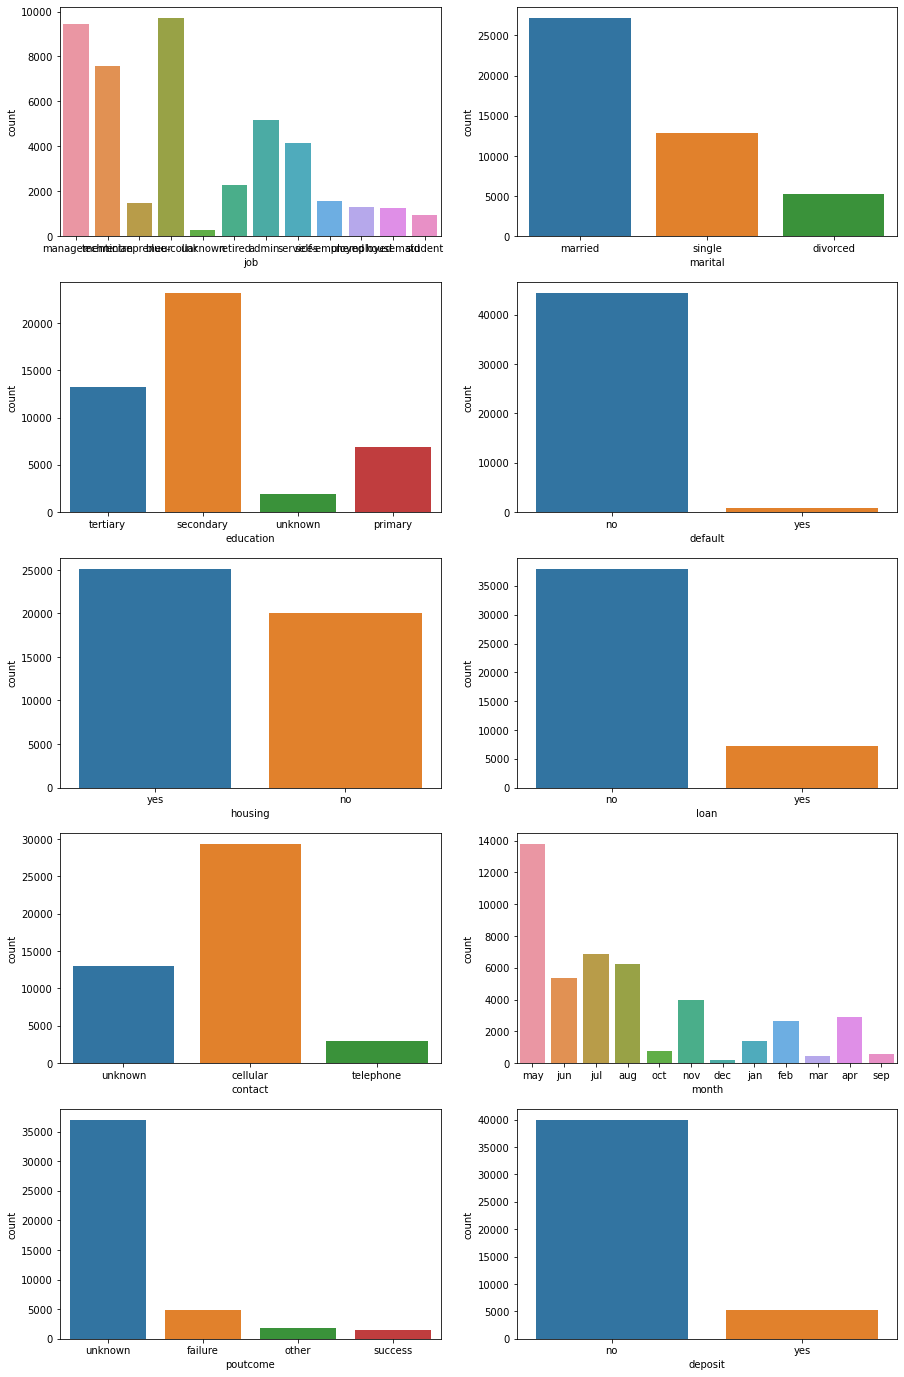

In [11]:
#Categorical feature distribution
plt.figure(figsize = (15, 60), facecolor='white')
plotnumber = 1
for col in categorical_cols:
    ax = plt.subplot(12, 2, plotnumber)
    sns.countplot(x = col, data = df)
    plotnumber += 1
plt.show()

In [12]:
for col in categorical_cols:
    print(df.groupby(['deposit',col]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

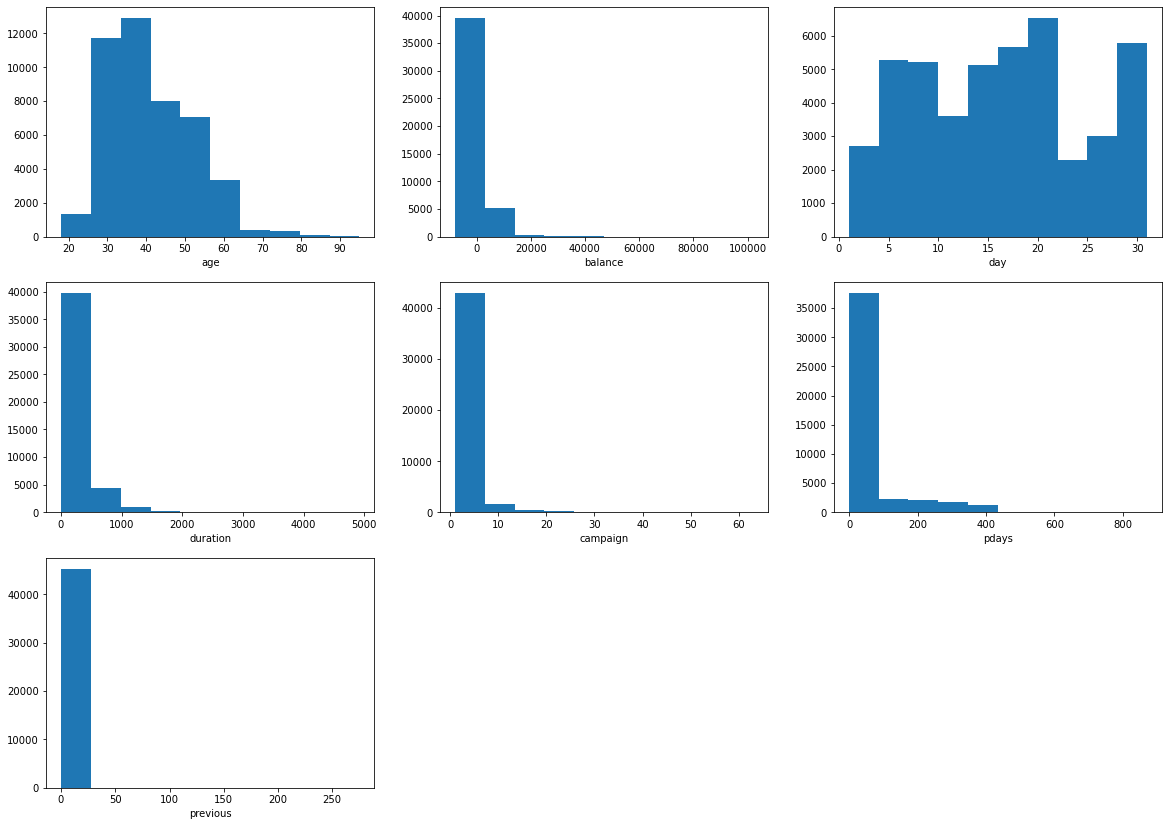

In [13]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for col in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    plt.hist(df[col])
    plt.xlabel(col)
    plotnumber+=1
plt.show()

In [14]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


In [15]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 559, dtype: int64

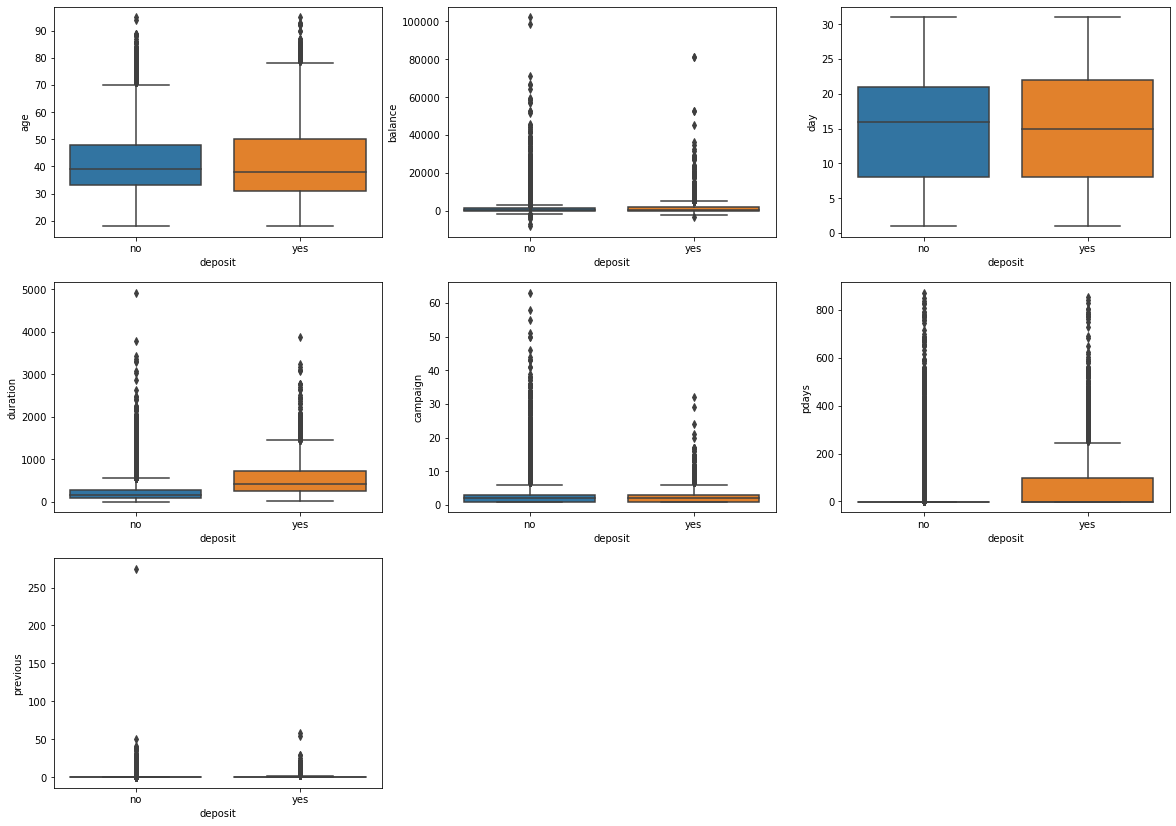

In [16]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for col in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[col], data=df)
#     plt.xlabel(col)
    plotnumber+=1
plt.show()

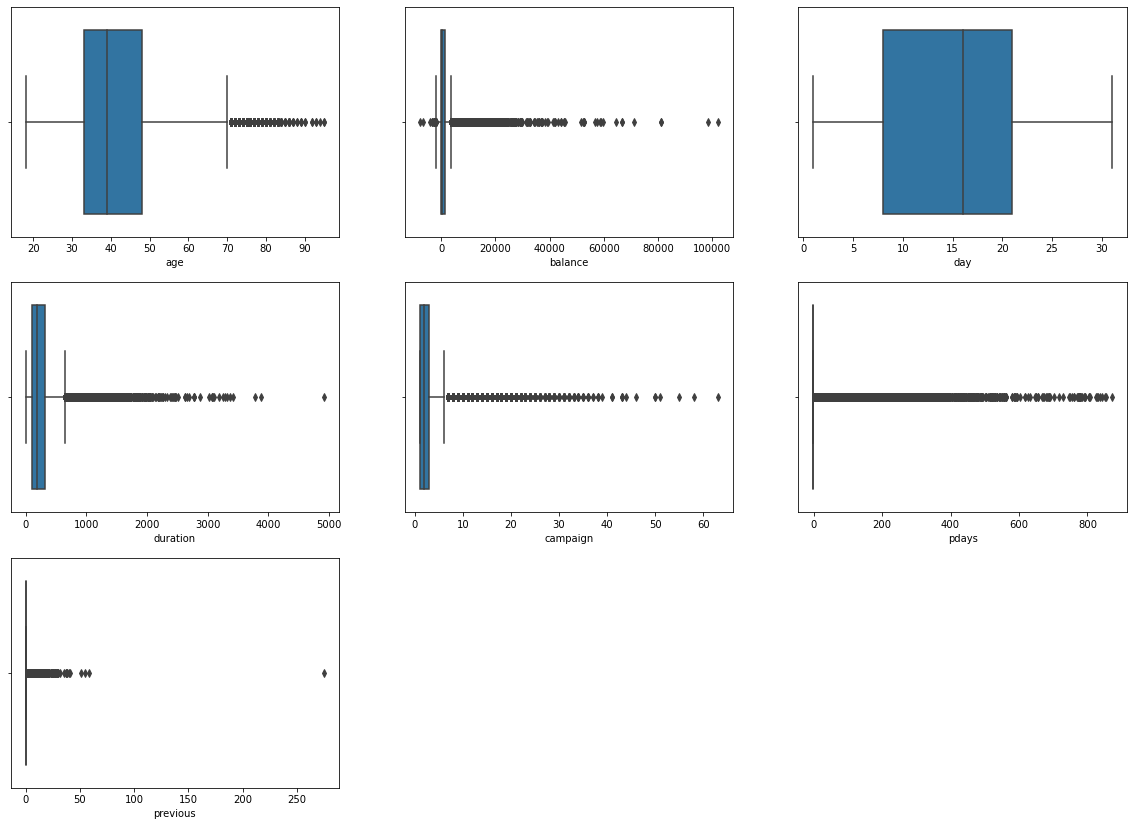

In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for col in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col)
    plotnumber+=1
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

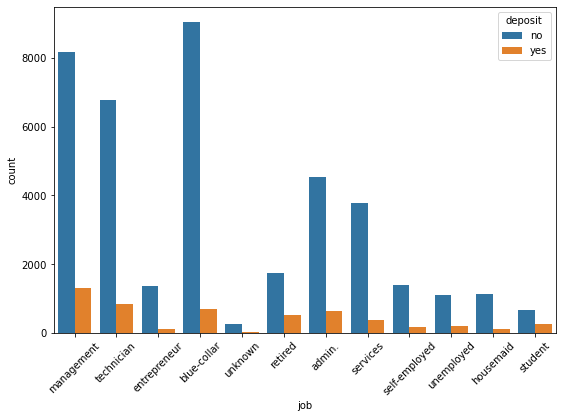

In [18]:
plt.figure(figsize = (9,6))
# total = len(df["job"])
g = sns.countplot(x = 'job', data = df, hue = 'deposit')
plt.xticks(rotation = 45)
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

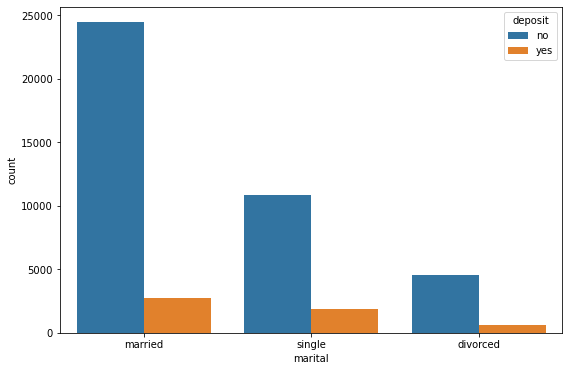

In [19]:
plt.figure(figsize = (9,6))
g = sns.countplot(x = 'marital', data = df, hue = 'deposit')
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

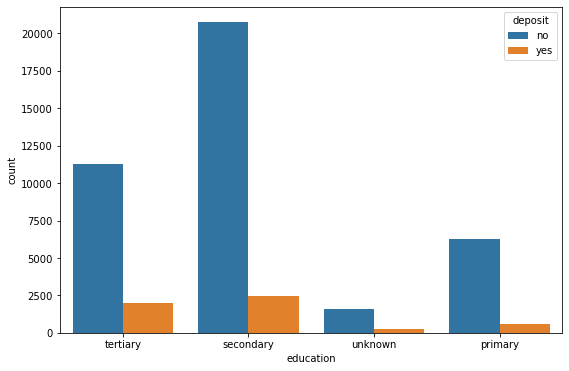

In [20]:
plt.figure(figsize = (9,6))
g = sns.countplot(x = 'education', data = df, hue = 'deposit')
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

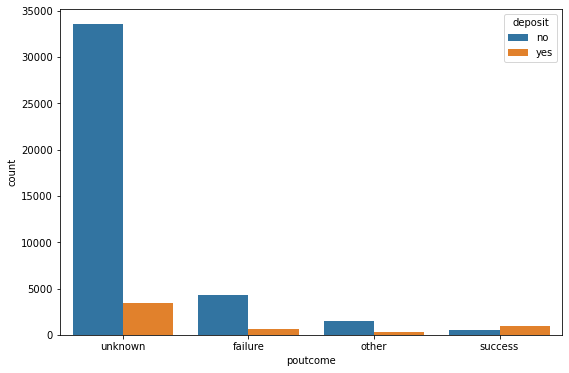

In [21]:
plt.figure(figsize = (9,6))
g = sns.countplot(x = 'poutcome', data = df, hue = 'deposit')
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

<AxesSubplot:xlabel='age', ylabel='deposit'>

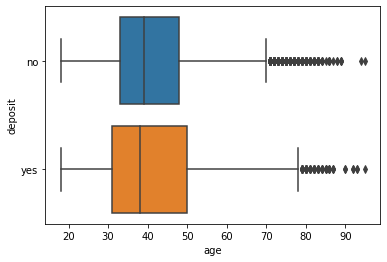

In [22]:
sns.boxplot(x="age", y="deposit", data=df, orient="h")

<AxesSubplot:xlabel='deposit', ylabel='duration'>

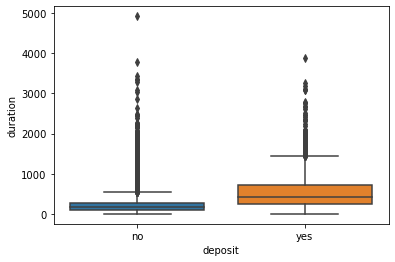

In [23]:
sns.boxplot(x = df["deposit"], y = df["duration"])

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

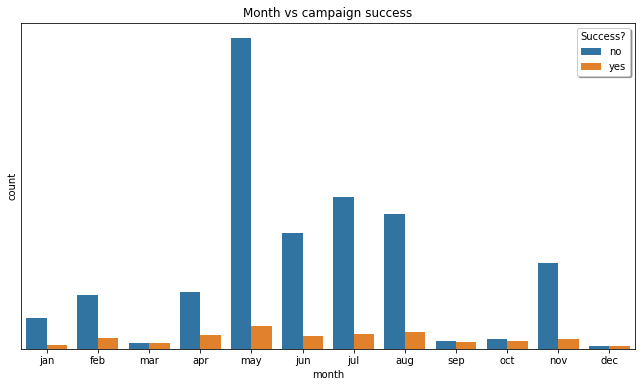

In [24]:
plt.figure(figsize=(11, 6));
plt.title('Month vs campaign success')
g = sns.countplot(x= 'month', hue = 'deposit', data=df, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']);
plt.legend(title='Success?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

In [ ]:
len(df[df['campaign'] > 33])

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
lr,ur=remove_outlier(df['campaign'])
df['campaign']=np.where(df['campaign']>ur,ur,df['campaign'])
df['campaign']=np.where(df['campaign']<lr,lr,df['campaign'])
lr,ur=remove_outlier(df['age'])
df['age']=np.where(df['age']>ur,ur,df['age'])
df['age']=np.where(df['age']<lr,lr,df['age'])

In [27]:
df1 = df.copy()

<AxesSubplot:>

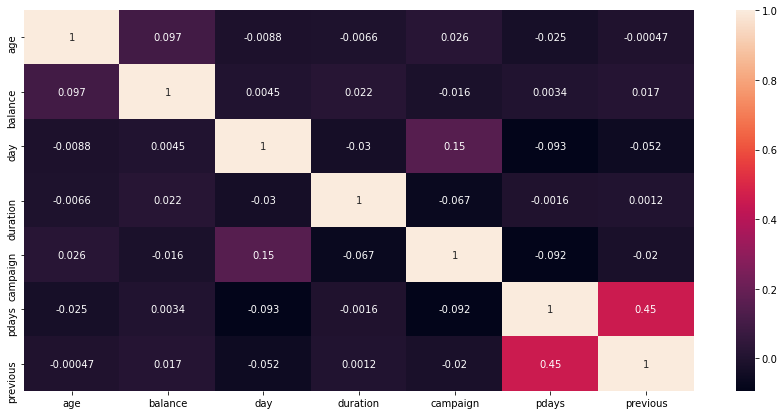

In [28]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [29]:
df1 = df1.drop(columns = ["pdays", "poutcome", "contact"])

In [30]:
X=df1.loc[:, df1.columns != 'deposit']
y=df1['deposit']

In [31]:
from sklearn.preprocessing import StandardScaler
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols)
#standard Scaler for Numerical Variables
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

In [32]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
sampler = RandomOverSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_sampled, y_sampled = sampler.fit_resample(X_train, y_train)
pd.Series(y_sampled).value_counts().to_frame()


,deposit
yes,29941
no,29941


In [33]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 10)
# pca.fit(X_sampled)
# X = pca.transform(X_sampled)

# print(X_sampled.shape)
# print(y_sampled.shape)
# print(X.shape)

# df_y = pd.DataFrame(data = y_sampled, columns = ['deposit'])

# df_X = pd.DataFrame(data = X, columns = ['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7','PC_8', 'PC_9','PC_10'])
# df_X

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, auc, roc_curve

In [35]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y_sampled = le.fit_transform(y_sampled)
y_test_sampled = le.fit_transform(y_test)

In [36]:
def model_classifier(model, X, y,x_test,y_test):
    """
    Creates folds manually, perform 
    Returns an array of validation (recall) scores
    """

    cv = KFold(n_splits = 3, shuffle = True, random_state = 4)

    
    scores = []
    scores_train = []
    
    
#         X_train,X_test = X.loc[train_index],X.loc[test_index]
#         y_train,y_test = y.loc[train_index],y.loc[test_index]

        # Fit the model on the training data
    model_obj = model.fit(X, y)
    y_pred_train = model_obj.predict(X)
    y_pred = model_obj.predict(x_test)
    # Score the model on the validation data
    score_train = accuracy_score(y, y_pred_train)
    score = accuracy_score(y_test, y_pred)
    report_train = classification_report(y, y_pred_train)
    report = classification_report(y_test, y_pred)
    conf_matrix_train = confusion_matrix(y, y_pred_train)
    conf_matrix = confusion_matrix(y_test, y_pred)

    scores_train.append(score_train)
    mean_score_train = np.array(scores_train).mean()

    scores.append(score)
    mean_score = np.array(scores).mean()
    
    print('Accuracy scores of the model - train: {:.2f}'.format(mean_score_train))
    print('\n Classification report of the model - train')
    print(report_train)
    
    print('\n Confusion Matrix of the model - train')
    print(conf_matrix_train)
    
    print('Accuracy scores of the model: {:.2f}'.format(mean_score))
    print('\n Classification report of the model')
    print(report)
    
    print('\n Confusion Matrix of the model')
    print(conf_matrix)

    plt.figure(figsize = (4, 5))

    probs = model_obj.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, _ = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
#     plt.title('ROC Random Forest',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)
    plt.show()
    headers = ["name", "score"]
    values = sorted(zip(X.columns, model_obj.feature_importances_), key=lambda x: x[1] * -1)
    feature_importances = pd.DataFrame(values, columns = headers)

    #plot feature importances
    fig = plt.figure(figsize=(15,7))
    x_pos = np.arange(0, len(feature_importances))
    plt.bar(x_pos, feature_importances['score'])
    plt.xticks(x_pos, feature_importances['name'])
    plt.xticks(rotation=90)
    plt.title('Feature importances')
    return model_obj

[17:21:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy scores of the model - train: 0.94

 Classification report of the model - train
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     29941
           1       0.91      0.97      0.94     29941

    accuracy                           0.94     59882
   macro avg       0.94      0.94      0.94     59882
weighted avg       0.94      0.94      0.94     59882


 Confusion Matrix of the model - train
[[27209  2732]
 [ 1045 28896]]
Accuracy scores of the model: 0.87

 Classification report of the model
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      9981
           1       0.46      0.79      0.58      1322

    accuracy              

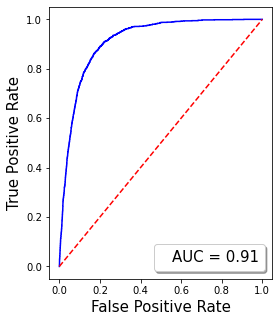

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

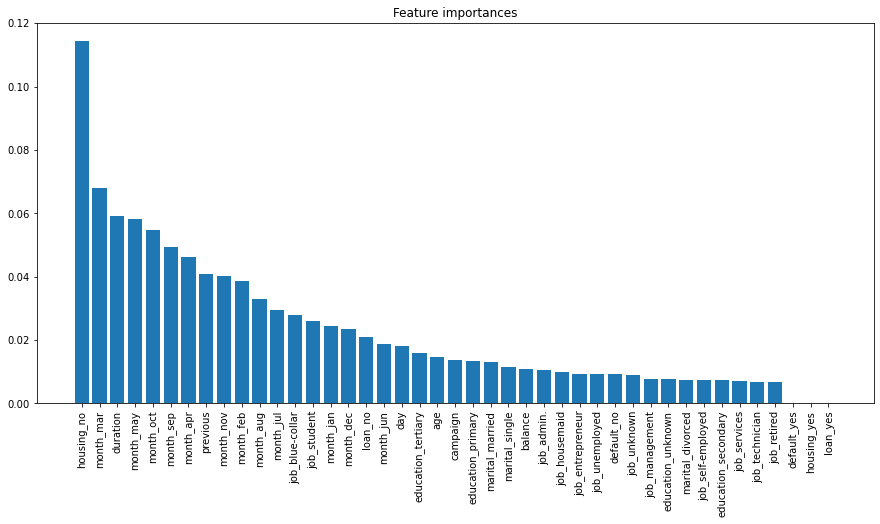

In [37]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

model_classifier(xgb, X_sampled, y_sampled,X_test,y_test_sampled)

# model_classifier(xgb, df_X,df_y, 'skf')

Accuracy scores of the model - train: 0.94

 Classification report of the model - train
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     29941
           1       0.91      0.98      0.94     29941

    accuracy                           0.94     59882
   macro avg       0.94      0.94      0.94     59882
weighted avg       0.94      0.94      0.94     59882


 Confusion Matrix of the model - train
[[27106  2835]
 [  693 29248]]
Accuracy scores of the model: 0.86

 Classification report of the model
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      9981
           1       0.44      0.77      0.56      1322

    accuracy                           0.86     11303
   macro avg       0.70      0.82      0.74     11303
weighted avg       0.91      0.86      0.88     11303


 Confusion Matrix of the model
[[8694 1287]
 [ 300 1022]]


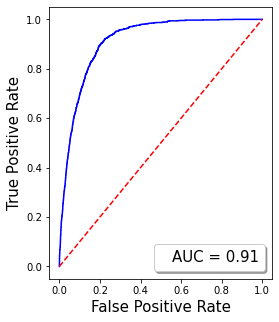

RandomForestClassifier(max_depth=15)

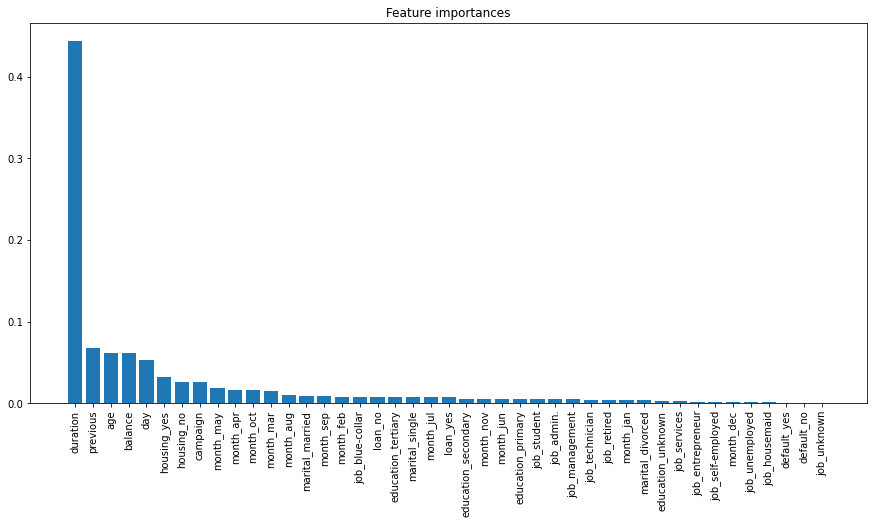

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 15)
model_classifier(rf, X_sampled, y_sampled,X_test,y_test_sampled)

Accuracy scores of the model - train: 0.83

 Classification report of the model - train
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     29941
           1       0.83      0.83      0.83     29941

    accuracy                           0.83     59882
   macro avg       0.83      0.83      0.83     59882
weighted avg       0.83      0.83      0.83     59882


 Confusion Matrix of the model - train
[[24873  5068]
 [ 4952 24989]]
Accuracy scores of the model: 0.83

 Classification report of the model
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      9981
           1       0.39      0.81      0.53      1322

    accuracy                           0.83     11303
   macro avg       0.68      0.82      0.71     11303
weighted avg       0.90      0.83      0.85     11303


 Confusion Matrix of the model
[[8297 1684]
 [ 250 1072]]


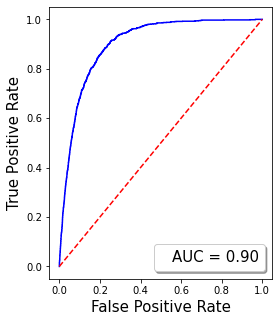

AdaBoostClassifier(learning_rate=0.3, n_estimators=200)

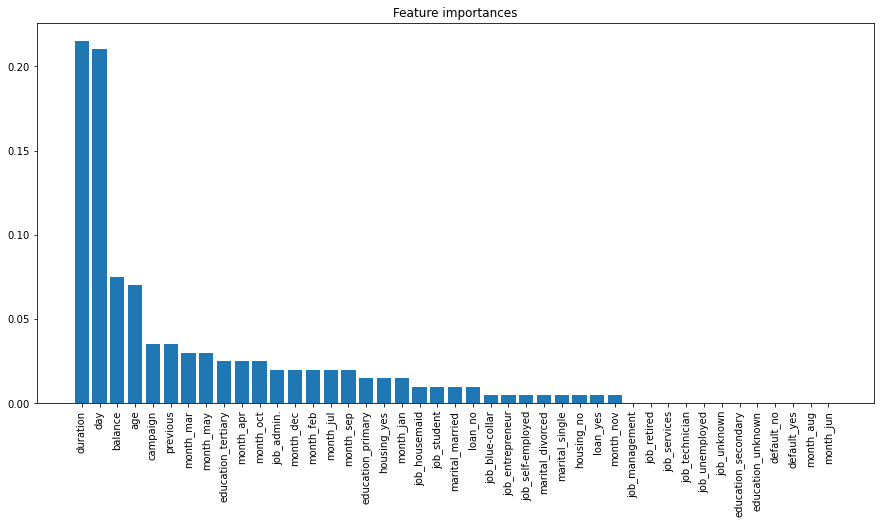

In [39]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(learning_rate=0.3,n_estimators=200)
model_classifier(abc, X_sampled, y_sampled,X_test,y_test_sampled)

In [40]:
categorical_cols=[]
for col in df_1.select_dtypes(include='object').columns:
    categorical_cols.append(col)
    print(df_1[col].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [46]:
df_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [58]:
df_1

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,y
0,58,4,1,2,2143,1,0,5,8,261,1,0,0
1,44,9,2,1,29,1,0,5,8,151,1,0,0
2,33,2,1,1,2,1,1,5,8,76,1,0,0
3,47,1,1,3,1506,1,0,5,8,92,1,0,0
4,33,11,2,3,1,0,0,5,8,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,825,0,0,17,9,977,3,0,1
45207,71,5,0,0,1729,0,0,17,9,456,2,0,1
45208,72,5,1,1,5715,0,0,17,9,1127,5,3,1
45209,57,1,1,1,668,0,0,17,9,508,4,0,0


In [41]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column in categorical_cols:
    df_1[column] = le.fit_transform(df_1[column])

In [47]:
df_1=df_1.drop(['default','contact','pdays','poutcome'],axis=1)

In [48]:
X=df_1.loc[:, df_1.columns != 'y']
Y=df_1['y']

In [49]:
xg = xgb.XGBClassifier()
modelVC1 = xg.fit(X, Y)

In [56]:
import gradio as gr
def result(Age,Job,Marital_Status,Education,Balance,Housing,Loan,Day,Month,Duration,No_of_times_contacted_during_this_campaign,No_of_times_contacted_in_last_campaign):
    
    if Job == 'Admin': 
        Job = 0
    elif Job == 'Blue-collar': 
        Job = 1
    elif Job == 'Entrepreneur': 
        Job = 2
    elif Job == 'Housemaid': 
        Job = 3        
    elif Job == 'Management': 
        Job = 4
    elif Job == 'Retired': 
        Job = 5        
    elif Job == 'Self-employed': 
        Job = 6
    elif Job == 'Services': 
        Job = 7
    elif Job == 'Student': 
        Job = 8        
    elif Job == 'Technician': 
        Job = 9
    elif Job == 'Unemployed': 
        Job = 10
    elif Job == 'Unknown': 
        Job = 11  
        

    if Marital_Status == 'Single': 
        Marital_Status = 2
    elif Marital_Status == 'Married': 
        Marital_Status = 1
    elif Marital_Status == 'Divorced': 
        Marital_Status = 0
        
    if Education == 'Primary': 
        Education = 0
    elif Education == 'Secondary': 
        Education = 1
    elif Education == 'Tertiary': 
        Education = 2
    elif Education == 'unknown': 
        Education = 3
    
    if Housing == 'Yes': 
        Housing = 1
    elif Housing == 'No': 
        Housing = 0
        
    if Loan == 'Yes': 
        Loan = 1
    elif Loan == 'No': 
        Loan = 0
    
   
        
    if Month == 'April': 
        Month = 0
    elif Month == 'August': 
        Month = 1
    elif Month == 'December': 
        Month = 2
    elif Month == 'February': 
        Month = 3        
    elif Month == 'January': 
        Month = 4
    elif Month == 'July': 
        Month = 5        
    elif Month == 'June': 
        Month = 6
    elif Month == 'March': 
        Month = 7
    elif Month == 'May': 
        Month = 8        
    elif Month == 'November': 
        Month = 9
    elif Month == 'October': 
        Month = 10
    elif Month == 'September': 
        Month = 11  
            
        
    Dict = {"Age": int(Age), "job": int(Job), "marital": int(Marital_Status),"education": int(Education), "balance": int(Balance), "housing": int(Housing),
            "loan": int(Loan), "day": int(Day),"month": int(Month), "duration": int(Duration), "campaign": int(No_of_times_contacted_during_this_campaign), "previous": int(No_of_times_contacted_in_last_campaign)}
    df1=pd.DataFrame([Dict])
    y_pred = modelVC1.predict(df1)
    if(y_pred==1):
        result='The customer is willing to take term deposit'
    else:
        result='The customer is not interested to take term deposit'
    return result

In [60]:
#create interface object
#Age,Job,Marital_Status,Education,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,No_of_times_contacted,Previous,Poutcome
gui = gr.Interface(fn=result, #callable function
                   inputs=["text", gr.inputs.Dropdown(["Management","Technician","Entrepreneur","Blue-collar","Unknown"
,"Retired","Admin.","Services","Self-employed","Unemployed","Housemaid"
,"Student"]),gr.inputs.Radio(["Single", "Married", "Divorced"]), gr.inputs.Radio(["Primary", "Secondary", "Tertiary","unknown"]),"text",  
                           gr.inputs.Radio(["Yes", "No"]),gr.inputs.Radio(["Yes", "No"]),"text",gr.inputs.Dropdown(["January","February","March","April","May","June","July","August","September","October","November","December"]),"text" ,"text","text"], #input format
                   outputs = "text") #output format
#display the interface
gui.launch()

Running on local URL:  http://127.0.0.1:7866/

To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7866/', None)